# Sleep Disorder Detection 

        The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

**Key Features of the Dataset:**
- **Comprehensive Sleep Metrics**: Explore sleep duration, quality, and factors influencing sleep patterns.
- **Lifestyle Factors**: Analyze physical activity levels, stress levels, and BMI categories.
- **Cardiovascular Health**: Examine blood pressure and heart rate measurements.
- **Sleep Disorder Analysis**: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea

**Dataset Columns:**
- **Person ID**: An identifier for each individual.
- **Gender**: The gender of the person (Male/Female).
- **Age**: The age of the person in years.
- **Occupation**: The occupation or profession of the person.
- **Sleep Duration (hours)**: The number of hours the person sleeps per day.
- **Quality of Sleep (scale: 1-10)**: A subjective rating of the quality of sleep, ranging from 1 to 10.
- **Physical Activity Level (minutes/day)**: The number of minutes the person engages in physical activity daily.
- **Stress Level (scale: 1-10)**: A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
- **BMI Category**: The BMI category of the person (e.g., Underweight, Normal, Overweight).
- **Blood Pressure (systolic/diastolic)**: The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
- **Heart Rate (bpm)**: The resting heart rate of the person in beats per minute.
- **Daily Steps**: The number of steps the person takes per day.
- **Sleep Disorder**: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

**Details about Sleep Disorder Column:**

- *None*: The individual does not exhibit any specific sleep disorder.
- *Insomnia*: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.
- *Sleep Apnea*: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

#### Loading Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [2]:
sleep_dis_df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [3]:
sleep_dis_df.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,none
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,none
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,none
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
sleep_dis_df.shape

(374, 13)

In [5]:
sleep_dis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
sleep_dis_df[['Systolic','Diastolic'] ]= sleep_dis_df['Blood Pressure'].str.split('/', expand=True)
sleep_dis_df.drop(['Blood Pressure'],axis=1, inplace= True)
sleep_dis_df.drop(['Person ID'],axis=1, inplace= True)

In [7]:
# Converting to float
sleep_dis_df['Systolic']=sleep_dis_df['Systolic'].astype(int)
sleep_dis_df['Diastolic']=sleep_dis_df['Diastolic'].astype(int)

In [8]:
sleep_dis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    object 
 11  Systolic                 374 non-null    int32  
 12  Diastolic                374 non-null    int32  
dtypes: float64(1), int32(2), int64(6), object(4)
memory usage: 35.2+ KB


In [9]:
sleep_dis_df.head(5)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,none,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,none,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,none,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


### Exploratory Data Analysis (EDA)

In [10]:
sleep_dis_df['Sleep Disorder'].value_counts()

Sleep Disorder
none           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

In [11]:
sleep_dis_df['Occupation'].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

Text(0.5, 1.0, 'Gender Vs Sleep Disorder')

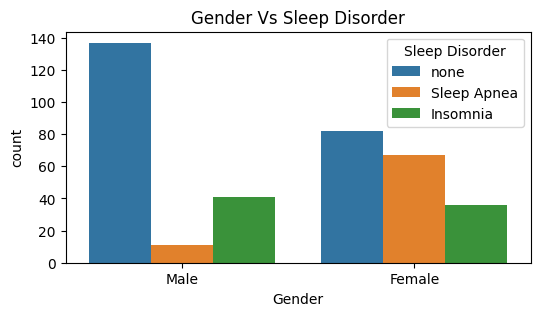

In [12]:
# Graph of Gender Vs Sleep Disorder
plt.figure(figsize=(6,3))
sn.countplot(data= sleep_dis_df,
             x = 'Gender',
             hue = 'Sleep Disorder');
plt.title("Gender Vs Sleep Disorder")

Text(0.5, 1.0, 'Occupation Vs Sleep Disorder')

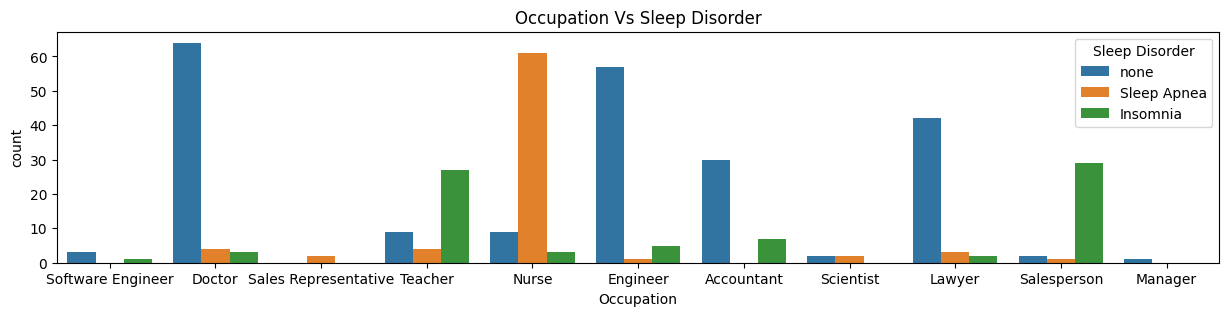

In [13]:
# Graph of Occupation Vs Sleep Disorder
plt.figure(figsize=(15,3))
sn.countplot(data= sleep_dis_df,
             x = 'Occupation',
             hue = 'Sleep Disorder');
plt.title("Occupation Vs Sleep Disorder")

Text(0.5, 1.0, 'Age Vs Sleep Disorder')

<Figure size 600x600 with 0 Axes>

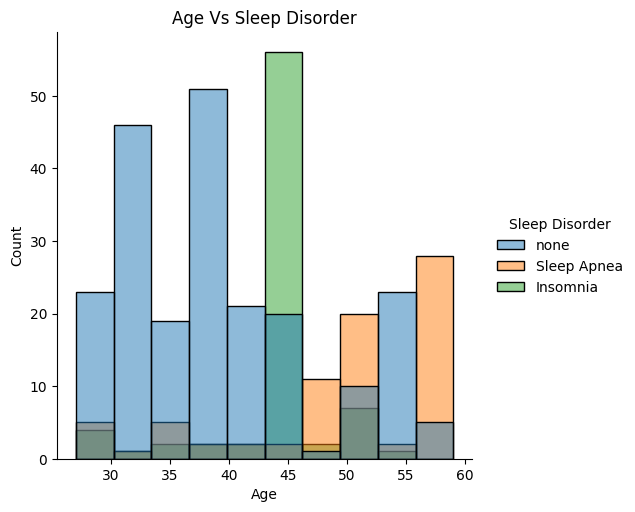

In [14]:
# Graph of Age Vs Sleep Disorder
plt.figure(figsize=(6,6))
sn.displot(data= sleep_dis_df,
             x = 'Age',
             hue = 'Sleep Disorder');
# plt.xticks(list(range(30,80,3)))
plt.title("Age Vs Sleep Disorder")

Text(0.5, 1.0, 'SLEEP DURATION VS QUALITY OF SLEEP')

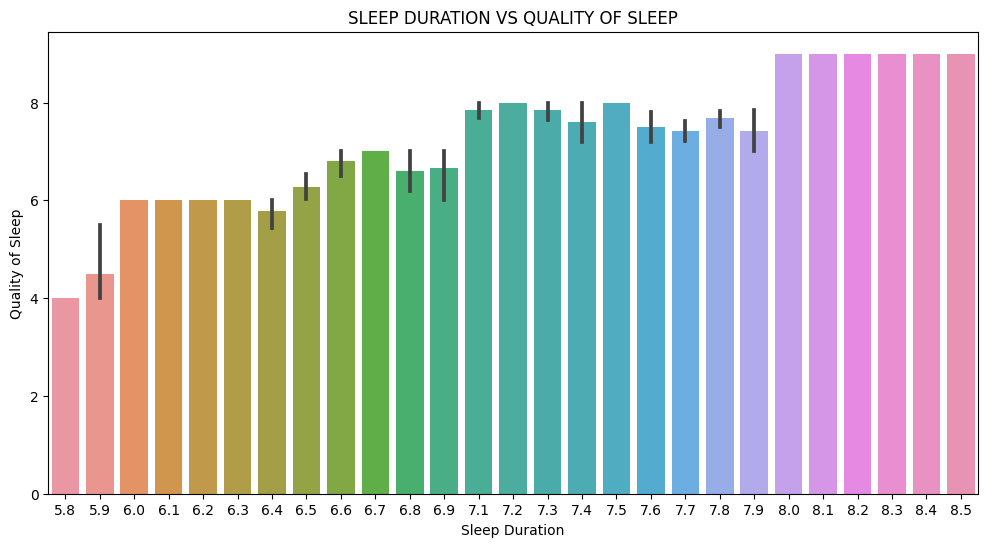

In [15]:
# Graph between sleep duration and quality of sleep
plt.figure(figsize=(12,6))
sn.barplot(x='Sleep Duration',
           y='Quality of Sleep',
           data=sleep_dis_df)
plt.title('SLEEP DURATION VS QUALITY OF SLEEP')

#### FROM GRAPH,QUALITY OF SLEEP INCREASES WITH SLEEP DURATION

Text(0.5, 1.0, 'STRESS LEVEL VS QUALITY OF SLEEP')

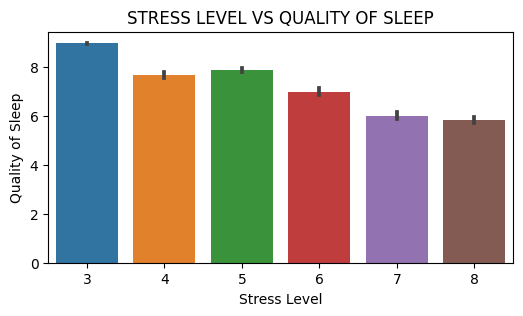

In [16]:
# Graph between stress level and quality of sleep
plt.figure(figsize=(6,3))
sn.barplot(x='Stress Level',
           y='Quality of Sleep',
           data=sleep_dis_df)
plt.title('STRESS LEVEL VS QUALITY OF SLEEP')

#### QUALITY OF SLEEP DECREASES WITH INCREASE IN STRESS

# DATA preprocessing

### Need of Transformation
- Categorical Features to Dummies or label encoder
- Numerical features to minmax scalar

#### Categorical Features
- Gender
- Occupation
- BMI Category

#### Numerical Features
- Age
- Sleep Duration
- Quality of Sleep
- Physical Activity Level
- Stress Level
- Heart Rate
- Daily Steps
- Systolic
- Diastolic

In [17]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
sleep_dis_df['Sleep Disorder']=LE.fit_transform(sleep_dis_df['Sleep Disorder'])
sleep_dis_df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,2,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,2,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,2,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,1,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,1,140,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,1,140,95
370,Female,59,Nurse,8.0,9,75,3,Overweight,68,7000,1,140,95
371,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,1,140,95
372,Female,59,Nurse,8.1,9,75,3,Overweight,68,7000,1,140,95


In [18]:
sleep_dis_df['Sleep Disorder'].value_counts()  

Sleep Disorder
2    219
1     78
0     77
Name: count, dtype: int64

In [19]:
# All Features
x_features = ['Gender','Age','Occupation','Sleep Duration',
              'Quality of Sleep','Physical Activity Level',
              'Stress Level','BMI Category','Heart Rate','Daily Steps',
              'Systolic','Diastolic']

In [20]:
encoder_sleep_dis_df = pd.get_dummies(sleep_dis_df[x_features],
                                      columns=['Gender','Occupation','BMI Category'])


In [21]:
encoder_sleep_dis_df = encoder_sleep_dis_df.replace({True : 1, False :0})

In [22]:
encoder_sleep_dis_df.head(5)

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic,Gender_Female,...,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,BMI Category_Normal,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight
0,27,6.1,6,42,6,77,4200,126,83,0,...,0,0,0,0,1,0,0,0,0,1
1,28,6.2,6,60,8,75,10000,125,80,0,...,0,0,0,0,0,0,1,0,0,0
2,28,6.2,6,60,8,75,10000,125,80,0,...,0,0,0,0,0,0,1,0,0,0
3,28,5.9,4,30,8,85,3000,140,90,0,...,0,1,0,0,0,0,0,0,1,0
4,28,5.9,4,30,8,85,3000,140,90,0,...,0,1,0,0,0,0,0,0,1,0


#### Setting X and y values

In [23]:
X = encoder_sleep_dis_df
y = sleep_dis_df['Sleep Disorder']

In [24]:
#OVERSAMPLING THE DATA

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=1)
X,y = os.fit_resample(X,y)

In [25]:
#SCALING
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X = mm.fit_transform(X)

#### Data Splitting

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state= 1)

## Model Selection

In [28]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

### 1. K-Nearest Neighbors (KNN)  

              precision    recall  f1-score   support

           0       0.85      0.90      0.88        63
           1       0.92      0.87      0.89        77
           2       0.88      0.88      0.88        58

    accuracy                           0.88       198
   macro avg       0.88      0.88      0.88       198
weighted avg       0.89      0.88      0.88       198



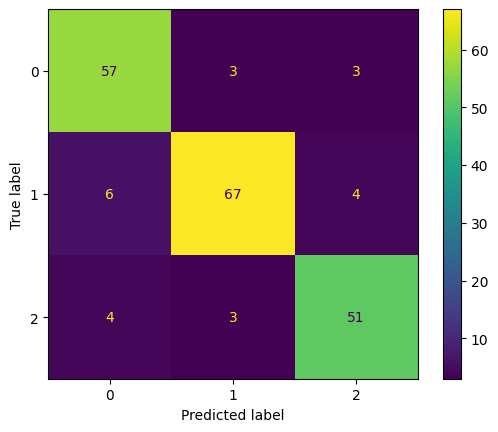

In [29]:
#(BRFORE HYPERPARAMETER TUNNING)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)


# KNN Classification Report
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))

### 2. Support Vector Classification  (SVC)

In [30]:
#(BRFORE HYPERPARAMETER TUNNING)
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train,y_train)
y_pred_sv = sv.predict(X_test)
print(classification_report(y_test,y_pred_sv))

              precision    recall  f1-score   support

           0       0.81      0.90      0.86        63
           1       0.93      0.81      0.86        77
           2       0.84      0.88      0.86        58

    accuracy                           0.86       198
   macro avg       0.86      0.86      0.86       198
weighted avg       0.86      0.86      0.86       198



In [31]:
grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001],'kernel':['rbf','poly','sigmoid']}
sv_grid = GridSearchCV(sv,
                        grid,
                        cv = 5,
                        scoring = 'accuracy')
sv_grid.fit(X_train, y_train)
sv_grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [32]:
#(AFTER HYPERPARAMETER TUNNING)

sv=SVC(C=1,kernel='poly',gamma=1)
sv.fit(X_train,y_train)
y_pred_sv =sv.predict(X_test)
print(classification_report(y_test,y_pred_sv ))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91        63
           1       0.93      0.92      0.93        77
           2       0.87      0.90      0.88        58

    accuracy                           0.91       198
   macro avg       0.91      0.91      0.91       198
weighted avg       0.91      0.91      0.91       198



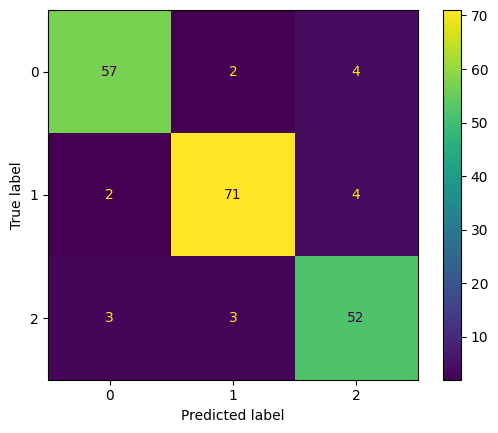

In [33]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_sv)

### 3. Naive Bayes

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        63
           1       0.89      0.83      0.86        77
           2       0.85      0.88      0.86        58

    accuracy                           0.85       198
   macro avg       0.85      0.86      0.85       198
weighted avg       0.85      0.85      0.85       198



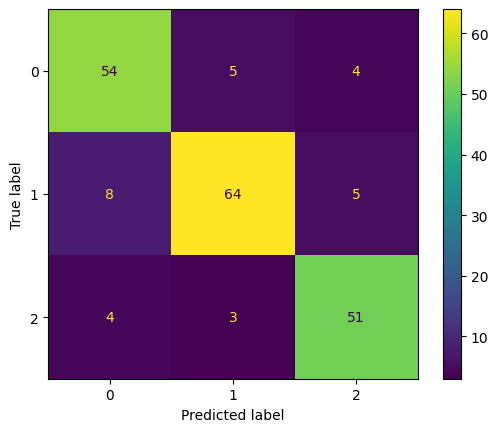

In [34]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
y_pred_nb = nb.predict(X_test)
print(classification_report(y_test,y_pred_nb))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_nb)

### 4. Random Forest

In [35]:
# BEFORE HYPERPARAMETER TUNNING

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        63
           1       0.92      0.90      0.91        77
           2       0.87      0.93      0.90        58

    accuracy                           0.90       198
   macro avg       0.90      0.91      0.90       198
weighted avg       0.91      0.90      0.90       198



In [36]:
grid1={'n_estimators':[25,50,100,150],'max_features':['sqrt','auto'],
         'max_depth':[2,4],'min_samples_split':[2,5],
         'min_samples_leaf':[1,2]}
rf_grid1=GridSearchCV(rf,
                      grid1,
                      cv=5,
                      scoring='accuracy')
rf_grid1.fit(X_train,y_train)
rf_grid1.best_params_

{'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 25}

              precision    recall  f1-score   support

           0       0.90      0.89      0.90        63
           1       0.92      0.88      0.90        77
           2       0.87      0.93      0.90        58

    accuracy                           0.90       198
   macro avg       0.90      0.90      0.90       198
weighted avg       0.90      0.90      0.90       198



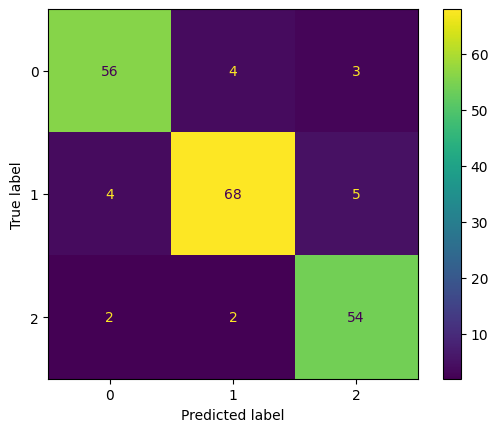

In [37]:
# AFTER HYPERPARAMETER TUNNING
rf = RandomForestClassifier(max_depth= 20,
                            max_features = 'sqrt',
                            min_samples_leaf = 1,
                            min_samples_split = 2,
                            n_estimators = 150)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test,y_pred_rf))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf))

### 5. Decision Tree

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        63
           1       0.92      0.91      0.92        77
           2       0.85      0.91      0.88        58

    accuracy                           0.90       198
   macro avg       0.90      0.90      0.90       198
weighted avg       0.91      0.90      0.90       198



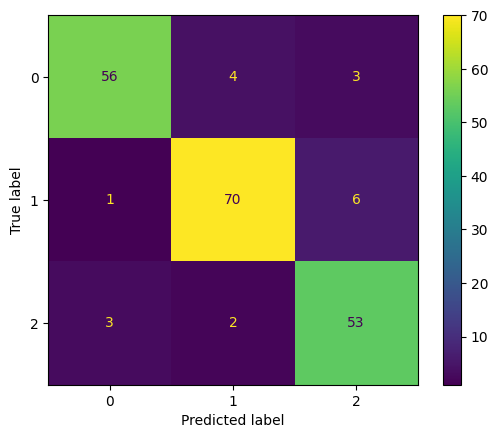

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
print(classification_report(y_test,y_pred_dt))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt)

### 6. Gradiant Boosting Classifier

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        63
           1       0.93      0.88      0.91        77
           2       0.87      0.91      0.89        58

    accuracy                           0.90       198
   macro avg       0.90      0.90      0.90       198
weighted avg       0.90      0.90      0.90       198



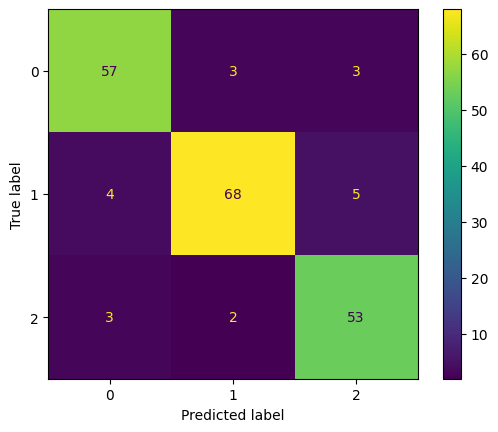

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=500,learning_rate=0.4,max_depth=8,random_state=1)
gbc.fit(X_train,y_train)
y_pred_gbc = gbc.predict(X_test)
print(classification_report(y_test,y_pred_gbc))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_gbc)

##### FROM THE ABOVE OBSERVATIONS IT IS CLEAR THAT SVC AND RANDOM FOREST ARE THE APPROPRIATE ALGORITHMS FOR PREDICTIONS WITH AN ACCURACY OF 91%
